In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [3]:
data = pd.read_csv("Salestrain.csv")
data = data["data"].values
data.shape

(96,)

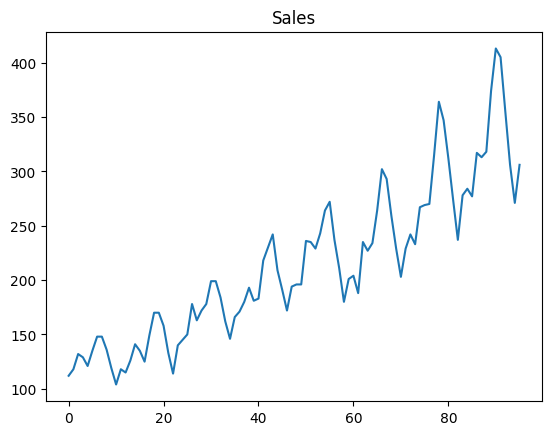

In [4]:
plt.plot(data, label="Data")
plt.title("Sales")
plt.show()

In [5]:
stl = STL(data, period=12)
result = stl.fit()

In [6]:
result.resid

array([  0.38835752,  -2.50750691,  -0.93625151,   2.14162814,
         1.95456987,   1.21890815,  -0.80002572,   0.80836527,
        -1.89984247,   1.34346989,   1.65187552,  -1.82788746,
        -4.50456314,  -1.06687059,  -3.05765906,  -1.90213468,
        -7.77034967,  -1.31406681,   2.38807894,   0.4812818 ,
         2.38690557,  -2.88002304,  -5.80996708,  -0.20666854,
         2.38439658,   0.81047685,   6.42077269,  -0.98227956,
         9.20876026,  -4.66903365,  -2.50406235,  -5.89644175,
        -0.16347293,  -0.26313277,   3.24944939,   2.09441975,
         3.28026057,   8.71633635,  -5.98884203,  -9.45304011,
        -8.92739973,   5.01082799,  -3.71550738,   2.92040346,
        -4.05009791,   0.06229684,   2.29264496,   1.64605422,
        -1.14771963,   1.01210254,   8.24062672,  14.55119312,
         7.83958054,  -2.78424127,  -6.19235752,   2.11499237,
         1.15053649,   2.76388894,  -0.70161573,  -2.47191521,
        -4.20817055, -13.42517527,  -1.67668854,  -4.62

In [7]:
anomalies = np.where(np.abs(result.resid) > 2.5 * np.std(result.resid))[0]
anomalies

array([51, 61])

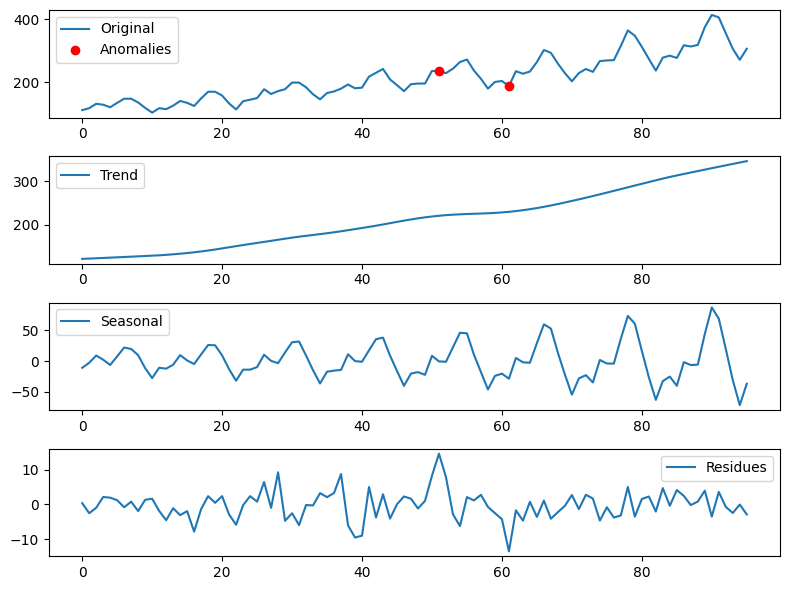

In [9]:
plt.figure(figsize=(8,6))

plt.subplot(411)
plt.plot(data, label="Original")
plt.plot(anomalies, data[anomalies], 'ro', markersize=6, label="Anomalies")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(result.trend, label="Trend")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(result.seasonal, label="Seasonal")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(result.resid, label="Residues")
plt.legend(loc='best')

plt.tight_layout()
plt.show()